<a href="https://colab.research.google.com/github/dahlia52/ESAA_2022-2/blob/main/PART3_%EC%BC%80%EB%9D%BC%EC%8A%A4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 딥러닝 텐서플로 ch3. 6 ~ 7 pg. 105 ~ 115

## 06 모델 저장 및 불러오기

In [3]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 정규화
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

In [1]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(32),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                        

In [4]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3140 - accuracy: 0.9120 - val_loss: 0.1348 - val_accuracy: 0.9601
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1509 - accuracy: 0.9543 - val_loss: 0.1104 - val_accuracy: 0.9671
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1199 - accuracy: 0.9631 - val_loss: 0.0923 - val_accuracy: 0.9712
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1039 - accuracy: 0.9679 - val_loss: 0.0947 - val_accuracy: 0.9699
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0899 - accuracy: 0.9720 - val_loss: 0.0902 - val_accuracy: 0.9719
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0816 - accuracy: 0.9742 - val_loss: 0.0847 - val_accuracy: 0.9762
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0782 - accuracy: 0.9749 - val_loss: 0.0822 - val_accuracy:

###[6-1] 모델을 파일로 저장

- 모델이 저장되는 형식: HDF5, SavedModel

In [5]:
# 모델을 h5 포맷으로 저장
model.save('h5-model.h5')

###[6-2] 저장된 모델 복원

In [6]:
# 모델 복원
h5_model = tf.keras.models.load_model('h5-model.h5')
h5_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                        

In [8]:
# 모델 검증
loss, acc = h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5 model] loss:{loss:.5f}, acc: {acc:.5f}')

h5 model] loss:0.08592, acc: 0.97290


In [9]:
# 모델을 SavedModel 포맷으로 저장 (.h5 확장자 생략 시 적용)
model.save('saved-model')

In [10]:
# 모델 복원
saved_model = tf.keras.models.load_model('saved-model')
saved_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                        

In [12]:
# 모델 검증(HDF5 포맷)
loss, auc = h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5_model] loss: {loss:.5f}, acc: {acc:.5f}')

# 모델 검증(SavedModel 포맷)
loss, auc = saved_model.evaluate(x_test, y_test, verbose=0)
print(f'saved_model] loss: {loss:.5f}, acc: {acc:.5f}')

h5_model] loss: 0.08592, acc: 0.97290
saved_model] loss: 0.08592, acc: 0.97290


## 07 복잡한 모델 생성

###[7-1] 함수형 API(Functional API)

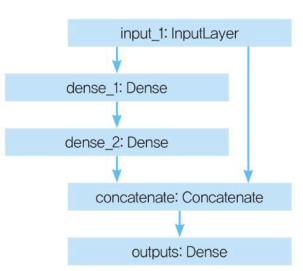

- Functional API는 함수의 입력 매개변수를 여러 개 갖는 다중 입력, 함수의 return 값을 여러 개 갖는 다중 출력, 같은 레벨에 여러 개의 층을 배치하여 입력과 출력을 공유하는 구조도 가능함.

- Sequential API는 단방향의 Sequential 모델만 구현할 수 있어 데이터의 흐름이 특정 레이어를 건너뛰거나 병합 및 분리하는 등의 구조의 모델은 구현할 수 없음.


In [13]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 정규화
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

- Input 레이어에 데이터의 입력 shape를 정의함.

- 레이어마다 반환되는 출력 값을 변수에 저장한 뒤 다음 레이어의 입력으로 연결함.

In [14]:
# 모델의 레이어를 체인 구조로 연결 Input 레이어 정의
input_layer = tf.keras.Input(shape=(28,28), name="InputLayer")
# 모델의 레이어를 체인 구조로 연결
x1 = tf.keras.layers.Flatten(name="Flatten")(input_layer)
x2 = tf.keras.layers.Dense(256, activation='relu', name='Dense1')(x1)
x3 = tf.keras.layers.Dense(64, activation='relu', name="Dense2")(x2)
x4 = tf.keras.layers.Dense(10, activation='softmax', name='OutputLayer')(x3)

In [16]:
# 모델 생성
func_model = tf.keras.Model(inputs=input_layer, outputs=x4, name="FunctionalModel")
# 모델 요약
func_model.summary()

Model: "FunctionalModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 28, 28)]          0         
                                                                 
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Dense1 (Dense)              (None, 256)               200960    
                                                                 
 Dense2 (Dense)              (None, 64)                16448     
                                                                 
 OutputLayer (Dense)         (None, 10)                650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


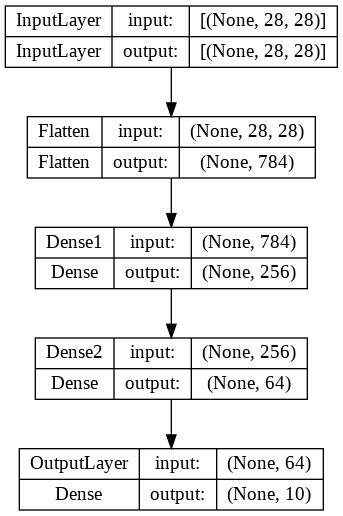

In [17]:
from tensorflow.keras.utils import plot_model
# 구조도 시각화
plot_model(func_model, show_shapes=True, show_layer_names=True, to_file='model.png')
# show_shapes=True: 데이터의 입출력 shape를 출력
# show_layer_names=True: 레이어의 이름 출력
# to_file: 이미지 파일로 저장

In [20]:
# 컴파일
func_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# 훈련
func_model.fit(x_train, y_train, epochs=3)
# 검증
loss, auc = func_model.evaluate(x_test, y_test, verbose=0)

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2170 - accuracy: 0.9359
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0880 - accuracy: 0.9729
Epoch 3/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0612 - accuracy: 0.9808


###[7-2] 모델 서브클래싱 (Model Subclassing)

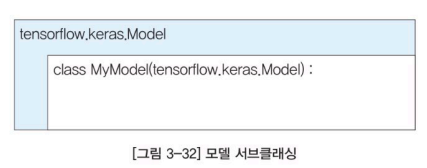

In [22]:
class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    # 초기값 설정
    self.flatten = tf.keras.layers.Flatten()
    self.dense1 = tf.keras.layers.Dense(256, activation='relu')
    self.dense2 = tf.keras.layers.Dense(64, activation='relu')
    self.dense3 = tf.keras.layers.Dense(10, activation='softmax')

  # call함수 overriding
  # 훈련용 함수 정의
  # x는 input
  def call(self, x):
    x = self.flatten(x)
    x = self.dense1(x)
    x = self.dense2(x)
    x = self.dense3(x)
    return x

call() 

- fit() 메소드가 호출되어 훈련하는 경우 호출되는 함수

- 모델의 입력부터 출력까지의 흐름, 즉 순전파를 정의하고 함수형 API와 같은 방식으로 모든 레이어를 체인처럼 연결함.



In [23]:
# 모델 생성
mymodel = MyModel()

# 모델의 이름 설정
mymodel._name = 'subclass_model'

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28,28)))

# 모델 요약
mymodel.summary()

Model: "subclass_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         multiple                  0         
                                                                 
 dense_3 (Dense)             multiple                  200960    
                                                                 
 dense_4 (Dense)             multiple                  16448     
                                                                 
 dense_5 (Dense)             multiple                  650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [24]:
# 컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# 훈련
mymodel.fit(x_train, y_train, epochs=3)
# 검증
loss, acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f"Subclassing Model] loss: {loss:.5f}, acc:{acc:.5f}")

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2162 - accuracy: 0.9351
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0910 - accuracy: 0.9719
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0620 - accuracy: 0.9804
Subclassing Model] loss: 0.07738, acc:0.97450


###[7-3] 서브클래싱 모델 파라미터를 활용한 생성

- Model Subclassing으로 생성하면 생성자 파라미터로 모델 내부 레이어의 하이퍼파라미터를 지정할 수 있음.

In [25]:
class MyModel(tf.keras.Model):
  # 생성자 파라미터 추가
  def __init__(self, units, num_classes):
    super(MyModel, self).__init__()
    # 초기값 설정
    self.flatten = tf.keras.layers.Flatten()
    self.dense1 = tf.keras.layers.Dense(units, activation='relu')
    self.dense2 = tf.keras.layers.Dense(units/4, activation='relu')
    self.dense3 = tf.keras.layers.Dense(num_classes, activation='softmax')

  # class overiding
  # 훈련용 함수 정의
  # x는 input
  def call(self, x):
    x = self.flatten(x)
    x = self.dense1(x)
    x = self.dense2(x)
    x = self.dense3(x)
    return x

In [27]:
# 모델의 생성자 파라미터로 기준이 되는 unit 개수를 입력받아 Dense 레이어의 유닛 개수를 계산하여 설정
# 모델 생성
mymodel = MyModel(256, 10)
# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28,28)))
# 모델 요약
mymodel.summary()

Model: "my_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         multiple                  0         
                                                                 
 dense_9 (Dense)             multiple                  200960    
                                                                 
 dense_10 (Dense)            multiple                  16448     
                                                                 
 dense_11 (Dense)            multiple                  650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [28]:
# 컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# 훈련
mymodel.fit(x_train, y_train, epochs=3)
# 검증
loss, auc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model w.parameters] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2150 - accuracy: 0.9359
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0855 - accuracy: 0.9740
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0590 - accuracy: 0.9814
Subclassing Model w.parameters] loss: 0.07800, acc: 0.97450
